### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [24]:
df = pd.read_csv('data/coupons.csv')

In [25]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [27]:
#Drop the 'car' column due to excessive missing values
df_cleaned = df.drop(columns=['car'])

#Fill missing values in specified columns with 'unknown'
columns_to_fill = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna('NA')


4. What proportion of the total observations chose to accept the coupon?

In [28]:
total_observations = len(df_cleaned)
accepted_count = df_cleaned['Y'].sum()
acceptance_rate = accepted_count / total_observations
print(f"Acceptance Rate: {acceptance_rate:.2%}")

Acceptance Rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

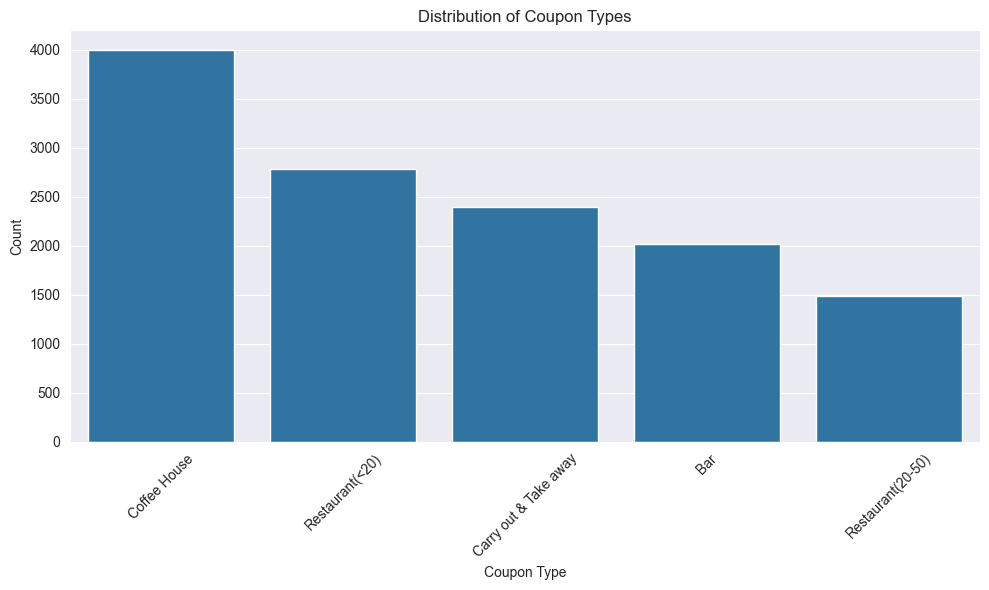

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='coupon', order=df_cleaned['coupon'].value_counts().index)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

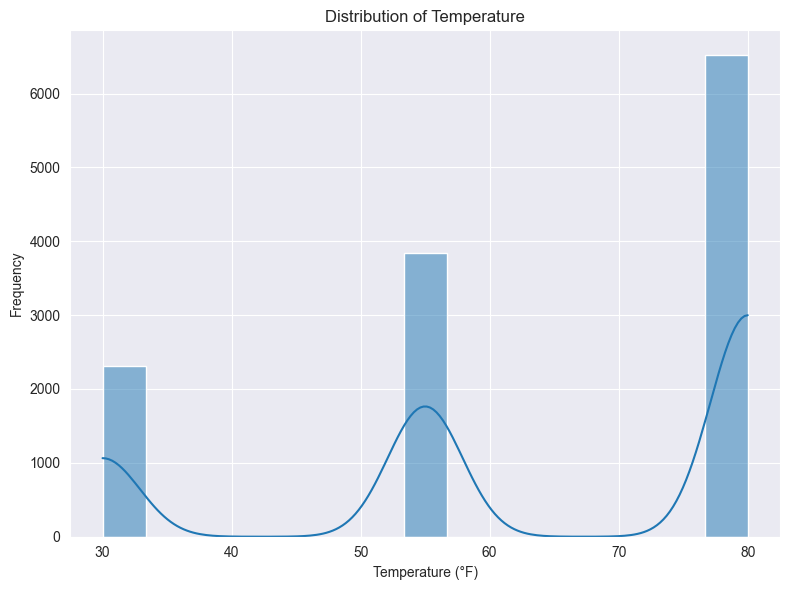

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='temperature', bins=15, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
df_bar = df_cleaned.loc[df_cleaned['coupon']=='Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NA,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [32]:
total_bar = len(df_bar)
accepted_bar = df_bar['Y'].sum()
bar_acceptance_rate = accepted_bar / total_bar
print(f"Acceptance Rate: {bar_acceptance_rate:.2%}")

Acceptance Rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [33]:
distinct_values = df_cleaned['Bar'].unique()
print(distinct_values)

['never' 'less1' '1~3' 'gt8' 'NA' '4~8']


In [34]:
#NA values ignored due to no information about the bar visits
less_or_equal_3 = df_cleaned[df_cleaned['Bar'].isin(['never', 'less1', '1~3'])]
more_than_3 = df_cleaned.loc[df_cleaned['Bar'].isin(['4~8', 'gt8'])]


# Acceptance rates
acceptance_less_or_equal_3 = less_or_equal_3['Y'].sum() / len(less_or_equal_3)
acceptance_more_than_3 = more_than_3['Y'].sum() / len(more_than_3)

print(f"Less than and Equal 3 visits/month: {acceptance_less_or_equal_3:.2%}")
print(f"More than 3 visits/month: {acceptance_more_than_3:.2%}")

Less than and Equal 3 visits/month: 56.21%
More than 3 visits/month: 62.25%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [35]:
age_distinct_values = df_cleaned['age'].unique()
print(age_distinct_values)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [36]:
# Age Conversion UDF
def extract_age(age_str):
    if age_str == 'below21':
        return 20
    elif '-' in age_str:
        return int(age_str.split('-')[0])
    elif age_str == '50plus':
        return 50
    else:
        return int(age_str)

# Apply the fixed transformation
df_cleaned['age_numeric'] = df_cleaned['age'].apply(extract_age)

# Define the target group: goes to bar > once/month AND age > 25
bar_often_age_gt25 = df_cleaned[
    df_cleaned['Bar'].isin(['1~3','4~8', 'gt8']) & (df_cleaned['age_numeric'] > 25)
]

others = df_cleaned.drop(bar_often_age_gt25.index)

# Calculate acceptance rates
rate_bar_often_age_gt25 = bar_often_age_gt25['Y'].mean()
rate_others = others['Y'].mean()


print(f"More than 1 visits/month and age > 25: {rate_bar_often_age_gt25:.2%}")
print(f"Others: {rate_others:.2%}")

More than 1 visits/month and age > 25: 62.15%
Others: 55.35%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [37]:
occupation_distinct_values = df_cleaned['occupation'].unique()
print(occupation_distinct_values)

['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [38]:
passenger_distinct_values = df_cleaned['passanger'].unique()
print(passenger_distinct_values)

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


In [39]:
target_group = df_cleaned[
    df_cleaned['Bar'].isin(['1~3', '4~8', 'gt8']) &
    (df_cleaned['passanger'] != 'Kid(s)') &
    (df_cleaned['occupation'] != 'Farming Fishing & Forestry')
]

comparison_group = df_cleaned.drop(target_group.index)

acceptance_target_group = target_group['Y'].mean()
acceptance_comparison_group = comparison_group['Y'].mean()

print(f"Target Group: {acceptance_target_group:.2%}")
print(f"Others: {acceptance_comparison_group:.2%}")

Target Group: 62.31%
Others: 54.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [40]:
marital_status_distinct_values = df_cleaned['maritalStatus'].unique()
print(marital_status_distinct_values)

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


In [41]:
restaurant_less_than_20_distinct_values = df_cleaned['RestaurantLessThan20'].unique()
print(restaurant_less_than_20_distinct_values)

['4~8' '1~3' 'less1' 'gt8' 'NA' 'never']


In [42]:
income_distinct_values = df_cleaned['income'].unique()
print(income_distinct_values)

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [43]:
# Filter for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1 = (
    df_cleaned['Bar'].isin(['1~3', '4~8', 'gt8']) &
    (df_cleaned['passanger'] != 'Kid(s)') &
    (df_cleaned['maritalStatus'] != 'Widowed')
)

# Filter for drivers who go to bars more than once a month and are under the age of 30
condition_2 = (
    df_cleaned['Bar'].isin(['1~3', '4~8', 'gt8']) &
    (df_cleaned['age_numeric'] < 30)
)

# Filter for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3 = (
    df_cleaned['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    df_cleaned['income'].str.contains('Less than \$12500|\$12500 - \$24999|\$25000 - \$37499|\$37500 - \$49999', na=False)
)

# Combine all conditions using OR
combined_condition = condition_1 | condition_2 | condition_3

# Define the target group and comparison group
target_group = df_cleaned[combined_condition]
comparison_group = df_cleaned.drop(target_group.index)

# Calculate acceptance rates
acceptance_rate_target = target_group['Y'].mean()
acceptance_rate_comparison = comparison_group['Y'].mean()

print(f"Acceptance rate (target group): {acceptance_rate_target:.2%}")
print(f"Acceptance rate (comparison group): {acceptance_rate_comparison:.2%}")

Acceptance rate (target group): 60.54%
Acceptance rate (comparison group): 54.31%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- Drivers who frequent bars more than once a month are more likely to accept bar coupons.
- Younger drivers (under 30) and those who are not widowed show a higher likelihood of accepting bar coupons.
- Drivers with higher bar visitation rates and no minor passengers are more inclined to accept bar coupons.
- Income and dining habits (e.g., frequenting cheap restaurants) may also influence coupon acceptance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [45]:
# Filter the dataset for Coffee House coupons
df_coffee = df_cleaned.loc[df_cleaned['coupon'] == 'Coffee House']

# Calculate the overall acceptance rate for Coffee House coupons
total_coffee = len(df_coffee)
accepted_coffee = df_coffee['Y'].sum()
coffee_acceptance_rate = accepted_coffee / total_coffee
print(f"Acceptance Rate for Coffee House Coupons: {coffee_acceptance_rate:.2%}")

# Compare acceptance rates based on frequency of visiting coffee houses
# Group 1: Visits coffee houses 3 or fewer times a month
less_or_equal_3_coffee = df_coffee[df_coffee['CoffeeHouse'].isin(['never', 'less1', '1~3'])]

# Group 2: Visits coffee houses more than 3 times a month
more_than_3_coffee = df_coffee[df_coffee['CoffeeHouse'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for both groups
acceptance_less_or_equal_3_coffee = less_or_equal_3_coffee['Y'].mean()
acceptance_more_than_3_coffee = more_than_3_coffee['Y'].mean()

print(f"Acceptance Rate (<= 3 visits/month): {acceptance_less_or_equal_3_coffee:.2%}")
print(f"Acceptance Rate (> 3 visits/month): {acceptance_more_than_3_coffee:.2%}")

# Compare acceptance rates based on age (e.g., age > 25)
coffee_age_gt25 = df_coffee[df_coffee['age_numeric'] > 25]
coffee_age_others = df_coffee[df_coffee['age_numeric'] <= 25]

# Calculate acceptance rates for both age groups
acceptance_age_gt25 = coffee_age_gt25['Y'].mean()
acceptance_age_others = coffee_age_others['Y'].mean()

print(f"Acceptance Rate (Age > 25): {acceptance_age_gt25:.2%}")
print(f"Acceptance Rate (Age <= 25): {acceptance_age_others:.2%}")

# Compare acceptance rates based on passengers (e.g., not traveling with kids)
coffee_no_kids = df_coffee[df_coffee['passanger'] != 'Kid(s)']
coffee_with_kids = df_coffee[df_coffee['passanger'] == 'Kid(s)']

# Calculate acceptance rates for both passenger groups
acceptance_no_kids = coffee_no_kids['Y'].mean()
acceptance_with_kids = coffee_with_kids['Y'].mean()

print(f"Acceptance Rate (No Kids): {acceptance_no_kids:.2%}")
print(f"Acceptance Rate (With Kids): {acceptance_with_kids:.2%}")

Acceptance Rate for Coffee House Coupons: 49.92%
Acceptance Rate (<= 3 visits/month): 44.94%
Acceptance Rate (> 3 visits/month): 67.50%
Acceptance Rate (Age > 25): 48.14%
Acceptance Rate (Age <= 25): 55.01%
Acceptance Rate (No Kids): 50.01%
Acceptance Rate (With Kids): 48.31%


In [52]:
# Compare acceptance rates based on occupation (e.g., not in Farming, Fishing, or Forestry)
coffee_not_farming = df_coffee[df_coffee['occupation'] != 'Farming Fishing & Forestry']
coffee_farming = df_coffee[df_coffee['occupation'] == 'Farming Fishing & Forestry']
# Calculate acceptance rates for both occupation groups
acceptance_not_farming = coffee_not_farming['Y'].mean()
acceptance_farming = coffee_farming['Y'].mean()
print(f"Acceptance Rate (Not in Farming): {acceptance_not_farming:.2%}")
print(f"Acceptance Rate (In Farming): {acceptance_farming:.2%}")

Acceptance Rate (Not in Farming): 49.91%
Acceptance Rate (In Farming): 54.55%


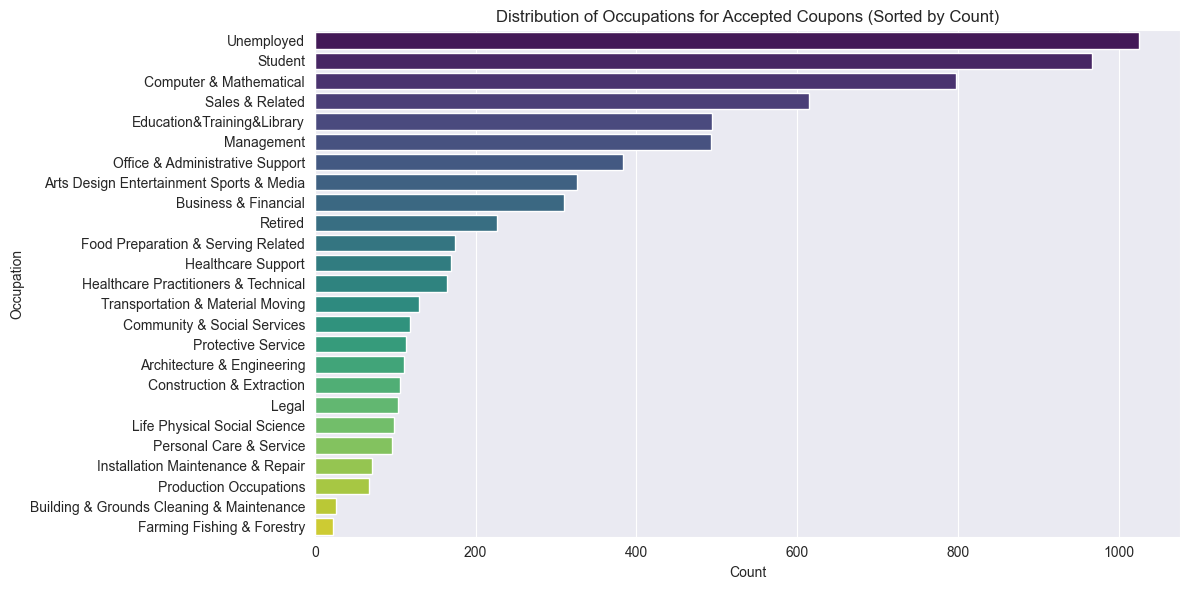

In [57]:
# Filter the dataset for accepted coupons
accepted_coupons = df_cleaned[df_cleaned['Y'] == 1]

# Count the occurrences of each occupation and sort by count
occupation_counts = accepted_coupons['occupation'].value_counts().sort_values(ascending=False)

# Plot a histogram of occupations sorted by count
plt.figure(figsize=(12, 6))
sns.barplot(y=occupation_counts.index, x=occupation_counts.values, hue=occupation_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Occupations for Accepted Coupons (Sorted by Count)')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()